In [1]:
import numpy as np
import matplotlib.pyplot as plt

import problem as pb

mainProblem = pb.Problem(
    grid = pb.Grid(pb.Vector2(0, 0), 40, 50),
    pieces = [
        pb.Piece(pb.Vector2(0, 0), 14, 27).setId(1),
        pb.Piece(pb.Vector2(0, 0), 8, 36).setId(2),
        pb.Piece(pb.Vector2(0, 0), 8, 9).setId(3),
        pb.Piece(pb.Vector2(0, 0), 6, 14).setId(4),
        pb.Piece(pb.Vector2(0, 0), 34, 5).setId(5),
        pb.Piece(pb.Vector2(0, 0), 18, 9).setId(6),
        pb.Piece(pb.Vector2(0, 0), 22, 9).setId(7),
        pb.Piece(pb.Vector2(0, 0), 18, 21).setId(8),
        pb.Piece(pb.Vector2(0, 0), 18, 15).setId(9),
    ]
)

Piece( position: (0, 0), width: 14, height: 27)
Piece( position: (20, 0), width: 8, height: 36)
Piece( position: (0, 0), width: 34, height: 5)
Is configuration valid ?: False
Score: 1164


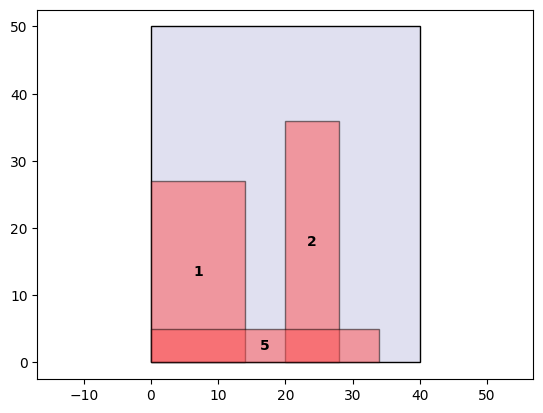

In [2]:
grid = mainProblem.grid

piece0 = mainProblem.pieces[0].clone()
piece1 = mainProblem.pieces[1].clone().setPosition(pb.Vector2(20, 0))
piece4 = mainProblem.pieces[4].clone()


config = pb.Config(piece0, piece1, piece4)

for piece in config.pieces:
    print(piece)

mainProblem.show(config)

[Vector2(6, 0), Vector2(0, 14), Vector2(6, 20)]
[Vector2(0, 14), Vector2(6, 0), Vector2(6, 20)]
Is configuration valid ?: True
Score: 1646


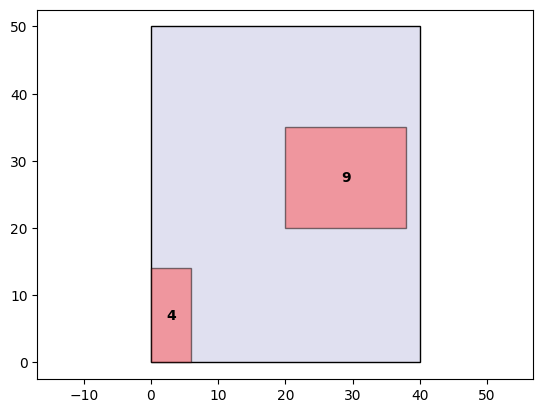

Is configuration valid ?: True
Score: 1622


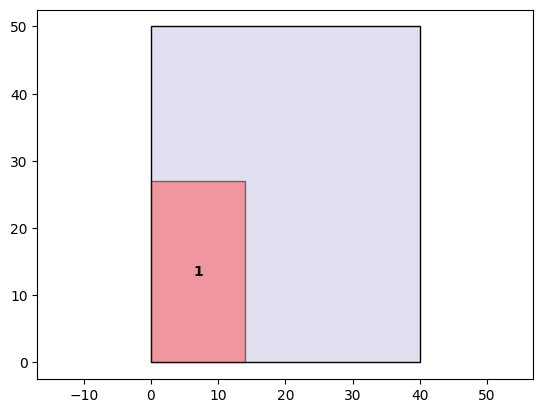

In [3]:
grid = mainProblem.grid

config = pb.Config()


mainProblem.constructiveDynamic(config)
config.add(mainProblem.pieces[-1].clone().setPosition(pb.Vector2(20, 20)))


piece = mainProblem.chooseRandomPiece(config)

vectors = mainProblem.findPossiblePositions(config, piece)
sorted_vectors = sorted(vectors, key=lambda v: v.x)
print(vectors)
print(sorted_vectors)

mainProblem.show(config)
mainProblem.show(pb.Config(piece))

Is configuration valid ?: True
Score: 656


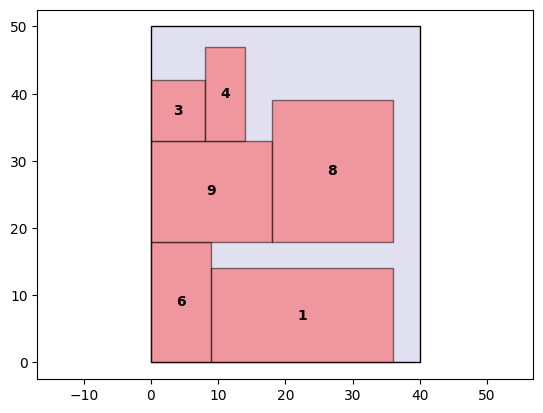

In [4]:
grid = mainProblem.grid

config = mainProblem.randomConfig()

mainProblem.show(config)

In [5]:
"""
config, score = mainProblem.metropolis(probability = 0.75, temperature = 0.1, itermax = 10000)
mainProblem.show(config)
"""

'\nconfig, score = mainProblem.metropolis(probability = 0.75, temperature = 0.1, itermax = 10000)\nmainProblem.show(config)\n'

In [6]:
# ==================================================================================================================
#                                                   GENETIC
# ==================================================================================================================

from train import Genetic, mainProblem

genetic = Genetic(
    mainProblem,
    population_size = 60,
    generations = 1000,
    tournament_size = 50,
    mutation_rate = 0.3,
    dynamic_probability = 0.75
)

In [7]:
configs = genetic.createPopulation()

for config in configs:
    #mainProblem.show(config)
    print(genetic.fitness(config))

0.001122334455667789
0.001564945226917058
0.0010672358591248667
0.0011001100110011
0.0013717421124828531
0.0009891196834817012
0.0015408320493066256
0.001122334455667789
0.001364256480218281
0.001001001001001001
0.0010070493454179255
0.0016
0.0030581039755351682
0.000676132521974307
0.00234192037470726
0.0018083182640144665
0.0012062726176115801
0.0006882312456985547
0.0011947431302270011
0.000612369871402327
0.0007662835249042146
0.0009250693802035153
0.0012422360248447205
0.0010070493454179255
0.0014064697609001407
0.0013986013986013986
0.0013831258644536654
0.0009891196834817012
0.0012300123001230013
0.0015408320493066256
0.001564945226917058
0.0014064697609001407
0.0013869625520110957
0.0007147962830593281
0.0010193679918450561
0.0029154518950437317
0.0008453085376162299
0.001564945226917058
0.0011947431302270011
0.0011325028312570782
0.0008795074758135445
0.0014992503748125937
0.000791765637371338
0.0011074197120708748
0.001321003963011889
0.0013531799729364006
0.00076628352490421

0.0011947431302270011
0.0010672358591248667
0.0009737098344693282
0.0008285004142502071
0.0015408320493066256
0.0009389671361502347
0.0008936550491510277
0.0007535795026375283
0.001610305958132045
0.0007993605115907274
0.0011074197120708748
0.0011402508551881414
0.002638522427440633
0.0006882312456985547
0.0011402508551881414
0.0018214936247723133
0.000835421888053467
0.001287001287001287
0.0011947431302270011
0.0008203445447087777
0.0013531799729364006
0.001088139281828074
0.0011402508551881414
0.0010787486515641855
0.0015552099533437014
0.0008658008658008658
0.0011001100110011
0.0008658008658008658
0.0013831258644536654
0.0013869625520110957
0.001869158878504673
0.001221001221001221
0.001321003963011889
0.0009182736455463728
0.0010256410256410256
0.0013386880856760374
0.000835421888053467
0.0013531799729364006
0.0009099181073703367
0.0007880220646178094
0.000881057268722467
0.0010471204188481676
0.001095290251916758
0.001321003963011889
0.00078064012490242
0.001221001221001221
0.0027

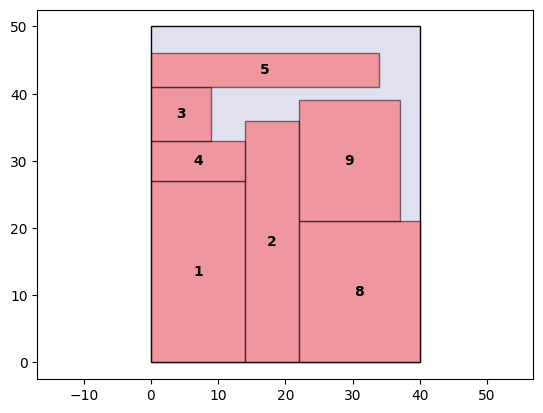

0.002770083102493075


In [8]:
configs = genetic.createPopulation()
best = genetic.tournamentSelection(configs)

for config in configs:
    print(genetic.fitness(config))

print(" ")

mainProblem.show(best)
print(genetic.fitness(best))

Génération 1: Meilleure fitness = 0.0009182736455463728
Génération 2: Meilleure fitness = 0.0011560693641618498
Génération 3: Meilleure fitness = 0.0014064697609001407
Génération 4: Meilleure fitness = 0.001610305958132045
Génération 5: Meilleure fitness = 0.0022172949002217295
Génération 6: Meilleure fitness = 0.001869158878504673
Génération 7: Meilleure fitness = 0.0022172949002217295
Génération 8: Meilleure fitness = 0.0022172949002217295
Génération 9: Meilleure fitness = 0.0029154518950437317
Génération 10: Meilleure fitness = 0.0022172949002217295
Génération 11: Meilleure fitness = 0.0022172949002217295
Génération 12: Meilleure fitness = 0.002770083102493075
Génération 13: Meilleure fitness = 0.0022172949002217295
Génération 14: Meilleure fitness = 0.0022172949002217295
Génération 15: Meilleure fitness = 0.0022172949002217295
Génération 16: Meilleure fitness = 0.0022172949002217295
Génération 17: Meilleure fitness = 0.0022172949002217295
Génération 18: Meilleure fitness = 0.002217

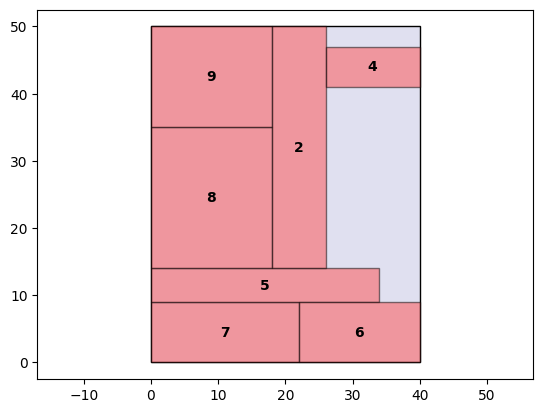

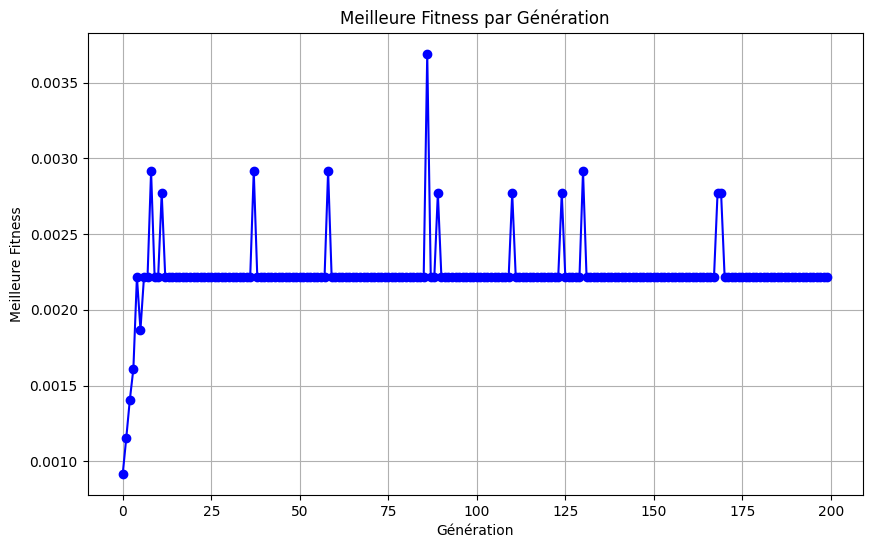

In [9]:
genetic = Genetic(
    mainProblem,
    population_size = 200,
    generations = 200,
    tournament_size = 5,
    mutation_rate = 0.5,
    dynamic_probability = 0.9
)

"""
genetic = Genetic(
    mainProblem,
    population_size = 200,
    generations = 100,
    tournament_size = 3,
    mutation_rate = 0.8,
    dynamic_probability = 0.6
)
"""

"""
genetic = Genetic(
    mainProblem,
    population_size = 70,
    generations = 50,
    tournament_size = 3,
    mutation_rate = 0.3,
    dynamic_probability = 0.9
)
"""

best_config, best_fitness_history = genetic.run(isDebug = True)

genetic.problem.show(best_config)


plt.figure(figsize=(10, 6))
plt.plot(best_fitness_history, marker='o', linestyle='-', color='b')
plt.title('Meilleure Fitness par Génération')
plt.xlabel('Génération')
plt.ylabel('Meilleure Fitness')
plt.grid(True)
plt.show()